# Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Resumen

## Origen de los datos:

**Dataset principal:** SAT-Propiedad-BU_2017-2023
**Origen:** Bases de datos de estadísticas criminales. Publicadas por la la Dirección Nacional de Estadística Criminal del Ministerio de Seguridad de la Nación.
**Enlace:** https://www.argentina.gob.ar/seguridad/estadisticascriminales/basesde-datos
Este dataset contiene datos de todas las provincias de la Argentina desde el 2017 hasta el 2023, con el fin de realizar una predicción centrado únicamente en la provincia de Tierra del Fuego, se filtro el dataset conservando los registros correspondientes a la provincia.

**Otros datasets:** 
Enlace: https://ipiec.tierradelfuego.gob.ar/areas-tematicas/
Se sumaron otras bases de datos que corresponden al IPIEC para complementar con variables sociales, económicas y demográficas de la provincia.
- Población total según ingreso medio per cápita. Aglomerado Ushuaia-Río Grande, provincia de Tierra del Fuego AeIAS. 2do trimestre 2016-2024
- Recaudación Impositiva por concepto, según períodos mensuales. Provincia de TDF AeIAS
- Índices de precios consumidor, resultados por divisiones de la canasta, categorías, bienes y servicios. Región Patagonia.
- Canasta básica alimentaria y canasta básica total. Región Patagonia.
- Población ocupada según escala de ingreso de la ocupación principal.
- Aglomerado Ushuaia-Río Grande, provincia de Tierra del Fuego AeIAS.
- Exportacion por grandes rubros

## Objetivo del modelado:
**Objetivo General:**
Desarrollar un modelo de Aprendizaje Automático que permita predecir el nivel
delictivo mensual (bajo, medio o alto) en la provincia de Tierra del Fuego, a partir
de variables demográficas y socioculturales registradas.

Objetivos Específicos:
- Identificar las variables más influyentes en la ocurrencia de hechos delictivos.
- Clasificar cada mes según su nivel delictivo utilizando técnicas de clasificación supervisada.

**Problema de clasificación**
El modelo de clasificación busca categorizar un mes determinado dentro de una de tres clases posibles: Nivel Bajo de criminalidad, Nivel Medio de criminalidad y Nivel alto de criminalidad.

## Pasos anteriores:

### 01_unificacion_dataset:


### 02_pre_modelato_datos: 

# Dataset

In [2]:
# Importacion del dataset
# Definicion de un path para acortar la definicion de la ruta
path = "\\Users\\Usuario\\Desktop\\hechos-delictivios-tdf\\"

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(path + r"data\processed\TDF-hechos-delictivos-simplificado.csv", delimiter =',')

# EDA

In [4]:
df.describe()

,anio,mes,cantidad_hechos,cantidad_hechos_inc_conocido,cantidad_hechos_inc_desconocido,cantidad_hechos_lugar_via_publ,cantidad_hechos_lugar_establec,cantidad_hechos_lugar_dom_part,cantidad_hechos_lugar_sd,cantidad_hechos_arma_sin_arma,cantidad_hechos_arma_sd,cantidad_hechos_origen_denuncia,cantidad_hechos_origen_intervenc,cantidad_hechos_origen_orden_jud,cantidad_hechos_origen_otro,cant_hechos_agrav_por_lesiones,cant_hechos_agrav_sin_lesiones,cantidad_inculpados,cantidad_inculpados_sexo_masc,cantidad_inculpados_sexo_fem,cantidad_inculpados_sexo_sd,cantidad_inculpados_edad_mas_18,cantidad_inculpados_edad_sd,población total,ocupados con ingresos,poblacion_por_departamento,cba-linea de indigencia,inversa del coeficiente de engel,cba-linea de pobreza,nivel general,alimentos y bebidas no alcohólicas,bebidas alcohólicas y tabaco,prendas de vestir y calzado,"vivienda, agua, electricidad y otros combustibles",equipamiento y mantenimiento del hogar,salud,transporte,comunicación,recreación y cultura,educación,restaurantes y hoteles,bienes y servicios varios,impuesto_total,impuesto ingresos brutos,convenio multilateral,impuesto de sellos,impuesto inmobiliario,total_exportacion_usd,prod_pri_exportacion_usd,origen_agro,origen_ind,combustible_y_energia,cantidad_hechos_mes_pasado,cantidad_hechos_con_arma,inculpados_menores_edad,desocupados,tasa_delitos
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02,166.000000,168.000000,168.000000,168.000000,168.000000
mean,2020.000000,6.500000,65.178571,15.839286,49.339286,15.654762,11.333333,37.833333,0.357143,64.708333,0.041667,53.767857,11.380952,0.011905,0.017857,0.017857,2.714286,18.244048,14.922619,3.267857,0.053571,15.696429,0.422619,164642.357143,67524.285714,86589.785714,11971.104405,2.698929,30428.716310,582.570357,602.601071,474.291905,584.429524,510.335833,604.486071,642.131667,682.621667,447.553571,559.235833,401.237500,571.764286,517.756190,2.673747e+09,3.682076e+08,6.747161e+08,9.065153e+07,3.162806e+05,1.353178e+07,2.508930e+06,1.322238e+06,1.315380e+06,8.385233e+06,65.144578,0.428571,2.125000,97118.071429,73.310355
std,2.005979,3.462373,32.024751,6.253459,28.582234,8.519079,6.357293,24.400026,0.849697,31.655586,0.228354,23.479121,13.705111,0.108782,0.132828,0.132828,8.247041,8.142075,6.921283,2.288930,0.550002,7.019868,1.919010,7383.143949,9145.938652,10284.768354,14580.587231,0.133726,35060.591291,650.802536,711.103118,495.621396,697.026990,456.436966,704.312866,723.191491,753.964234,392.084471,635.060210,350.280897,690.672403,536.374152,3.020918e+09,4.703911e+08,6.580441e+08,1.048706e+08,6.510533e+05,9.879849e+06,3.680543e+06,1.796201e+06,2.356646e+06,9.581545e+06,32.125561,0.785889,2.352696,6037.952351,31.875153
min,2017.000000,1.000000,15.000000,5.000000,9.000000,2.000000,1.000000,8.000000,0.000000,15.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,0.000000,0.000000,5.000000,0.000000,151966.000000,46321.000000,71689.000000,1848.500000,2.340000,5064.890000,102.560000,100.950000,101.190000,100.910000,110.320000,101.070000,104.730000,102.480000,101.660000,100.960000,106.690000,102.270000,102.480000,4.678646e+08,5.741652e+07,1.440901e+08,1.722238e+07,0.000000e+00,6.574990e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,15.000000,0.000000,0.000000,90428.000000,19.414962
25%,2018.000000,3.750000,39.000000,12.000000,25.000000,10.000000,7.000000,16.000000,0.000000,39.000000,0.000000,34.750000,2.750000,0.00

In [5]:
df["nivel_criminalistico"].value_counts()

nivel_criminalistico
Medio    57
Bajo     56
Alto     55
Name: count, dtype: int64

<Axes: xlabel='nivel_criminalistico', ylabel='count'>

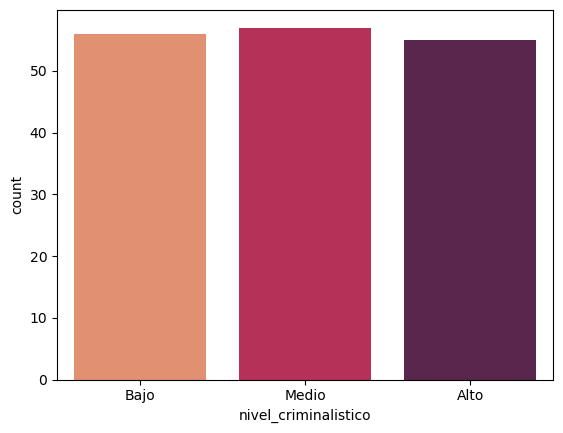

In [6]:
sns.countplot(df, x="nivel_criminalistico",palette='rocket', hue="nivel_criminalistico", order=['Bajo', 'Medio', 'Alto'])

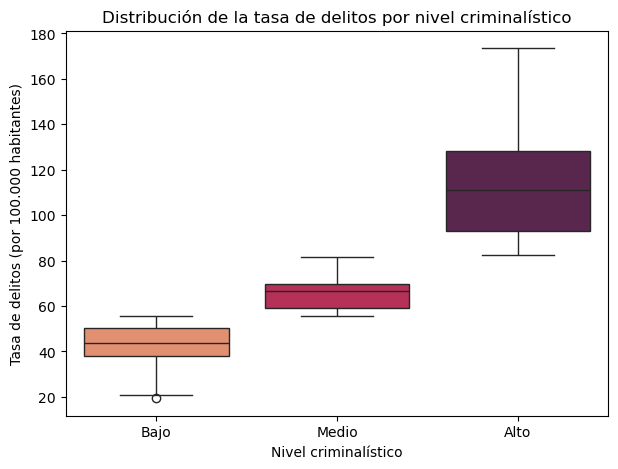

In [7]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='nivel_criminalistico', y='tasa_delitos', palette='rocket',  hue="nivel_criminalistico",  order=['Bajo', 'Medio', 'Alto'])

plt.title('Distribución de la tasa de delitos por nivel criminalístico')
plt.xlabel('Nivel criminalístico')
plt.ylabel('Tasa de delitos (por 100.000 habitantes)')
plt.show()

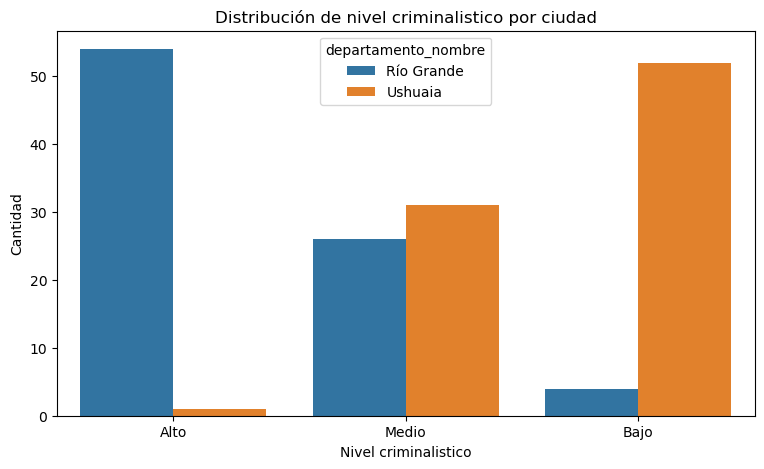

In [8]:
plt.figure(figsize=(9, 5))
sns.countplot(df, x='nivel_criminalistico', hue='departamento_nombre')
plt.title("Distribución de nivel criminalistico por ciudad")
plt.xlabel("Nivel criminalistico")
plt.ylabel("Cantidad")
plt.show()

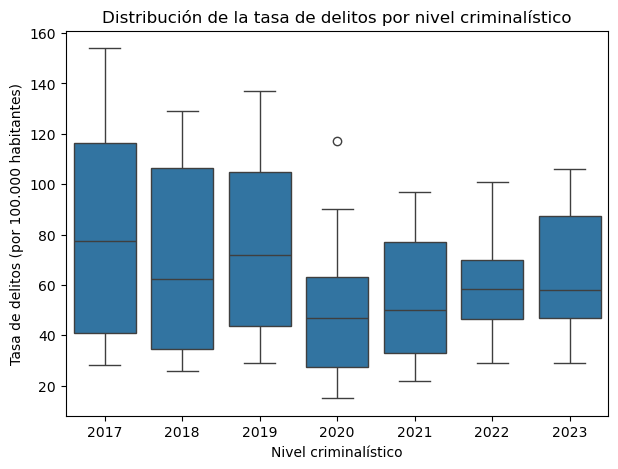

In [9]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='anio', y='cantidad_hechos')

plt.title('Distribución de la tasa de delitos por nivel criminalístico')
plt.xlabel('Nivel criminalístico')
plt.ylabel('Tasa de delitos (por 100.000 habitantes)')
plt.show()

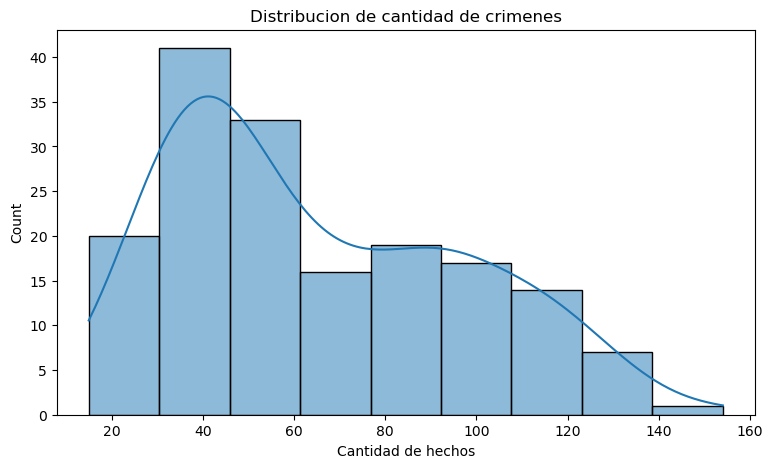

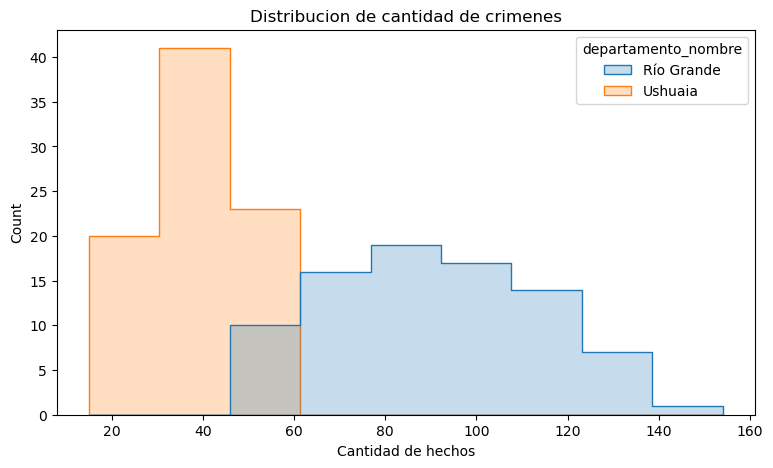

In [10]:
plt.figure(figsize=(9, 5))
sns.histplot(df["cantidad_hechos"], kde=True)
plt.title("Distribucion de cantidad de crimenes")
plt.xlabel("Cantidad de hechos")
plt.show()

plt.figure(figsize=(9, 5))
sns.histplot(data=df, x="cantidad_hechos", hue="departamento_nombre", element="step")
plt.title("Distribucion de cantidad de crimenes")
plt.xlabel("Cantidad de hechos")
plt.show()

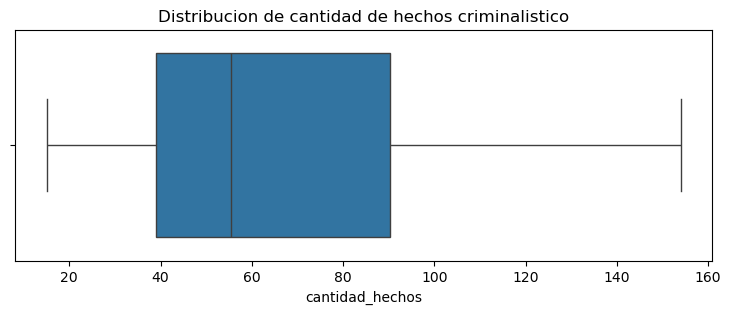

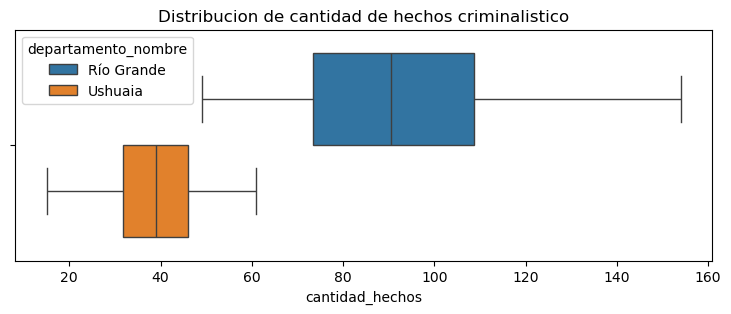

In [11]:
plt.figure(figsize=(9, 3))
sns.boxplot(data=df, x='cantidad_hechos')
plt.title("Distribucion de cantidad de hechos criminalistico")
plt.show()

plt.figure(figsize=(9, 3))
sns.boxplot(data=df, x='cantidad_hechos', hue="departamento_nombre")
plt.title("Distribucion de cantidad de hechos criminalistico")
plt.show()

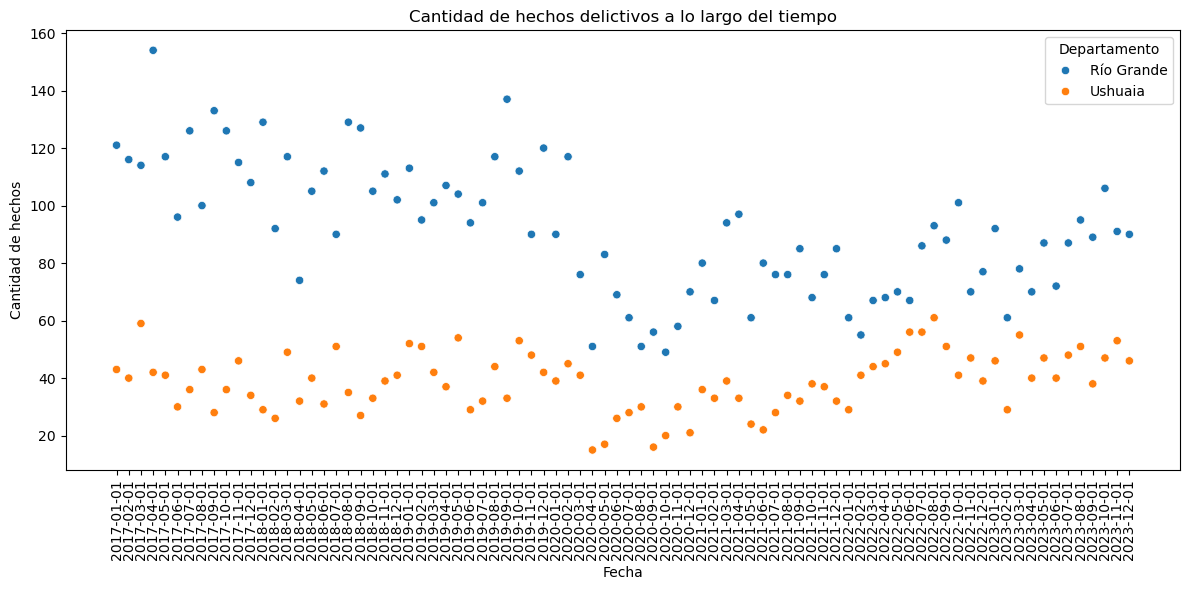

In [12]:
# Diagrama de dispersion
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='fecha', y='cantidad_hechos', hue='departamento_nombre')

plt.title('Cantidad de hechos delictivos a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de hechos')
plt.xticks(rotation=90)
plt.legend(title='Departamento')
plt.tight_layout()
plt.show()

In [13]:
def graficos_distribucion(df, columnas, bins=30):
    for col in columnas:
        plt.figure(figsize=(12, 5))

        # Histograma con KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col].dropna(), kde=True, bins=bins)
        plt.title(f'Histograma con KDE - {col}')
        plt.xlabel(col)

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col].dropna())
        plt.title(f'Boxplot - {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()


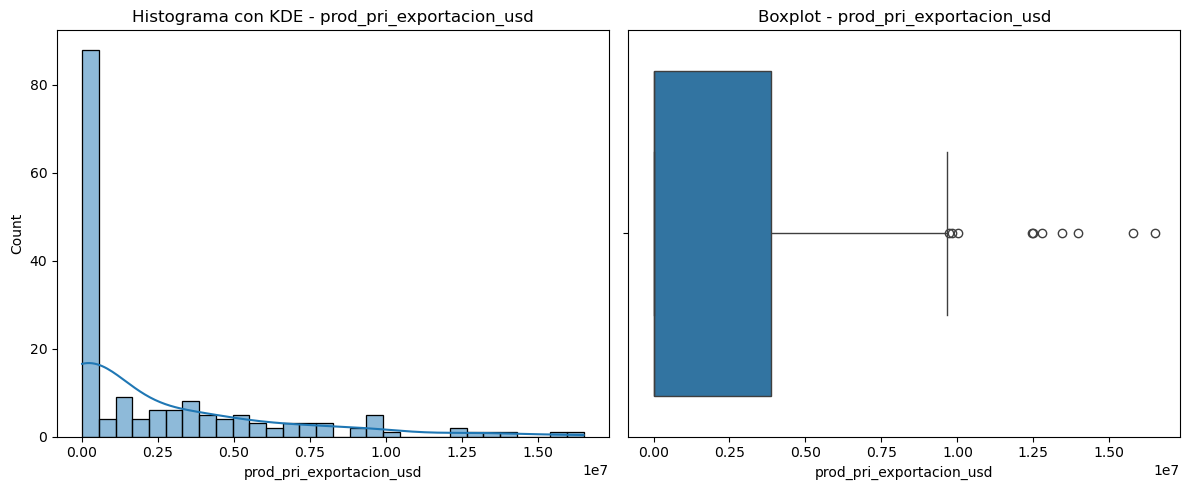

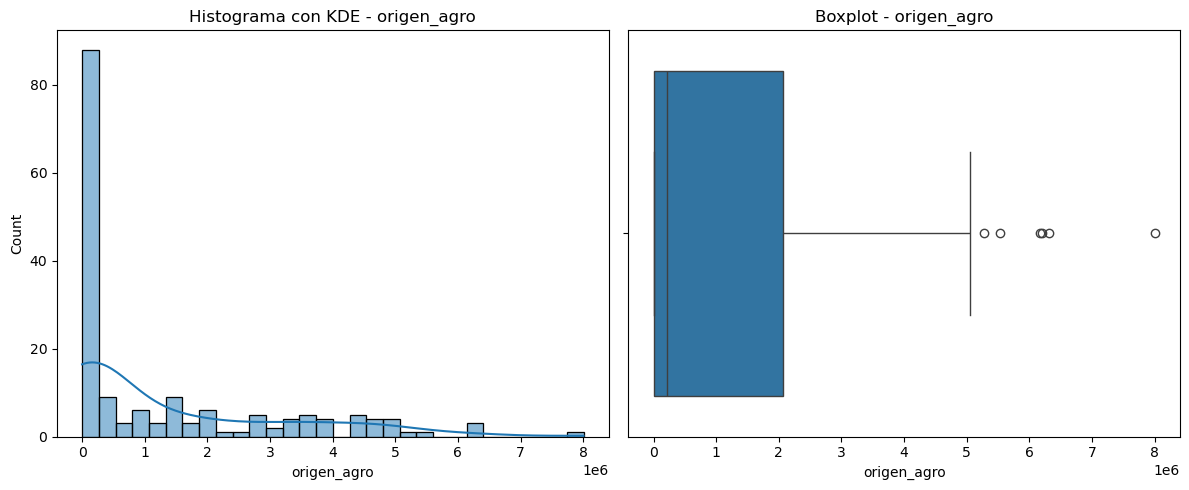

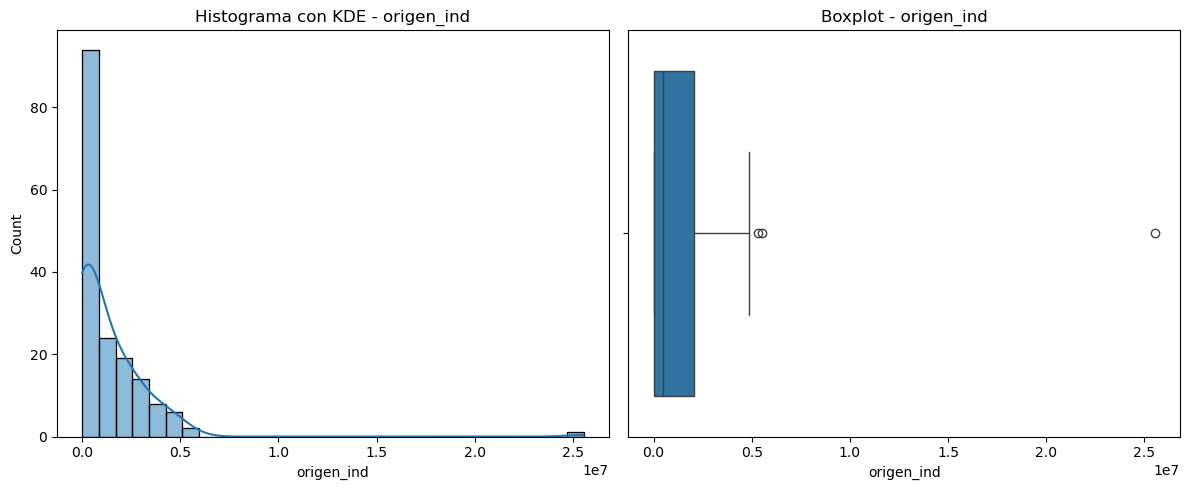

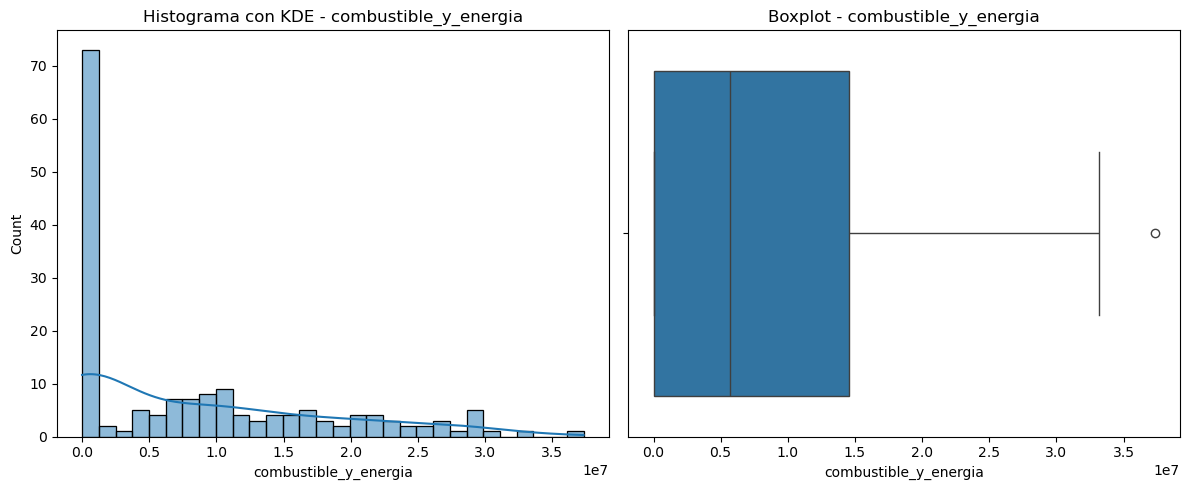

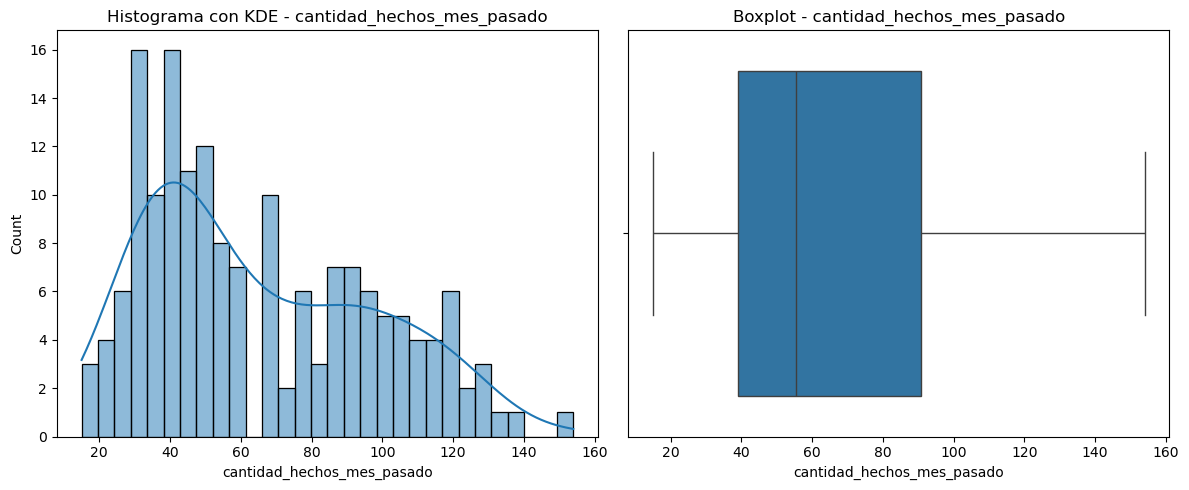

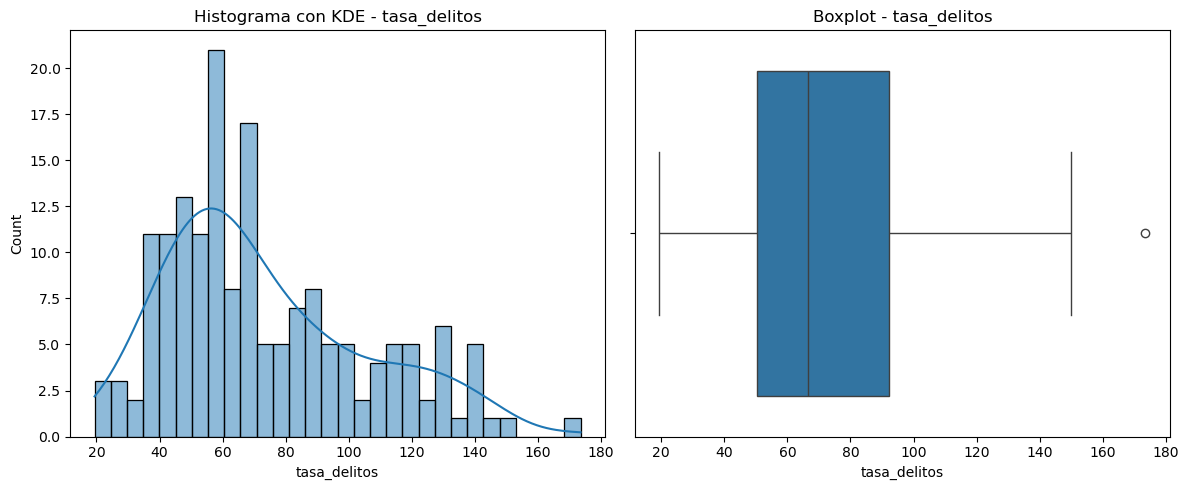

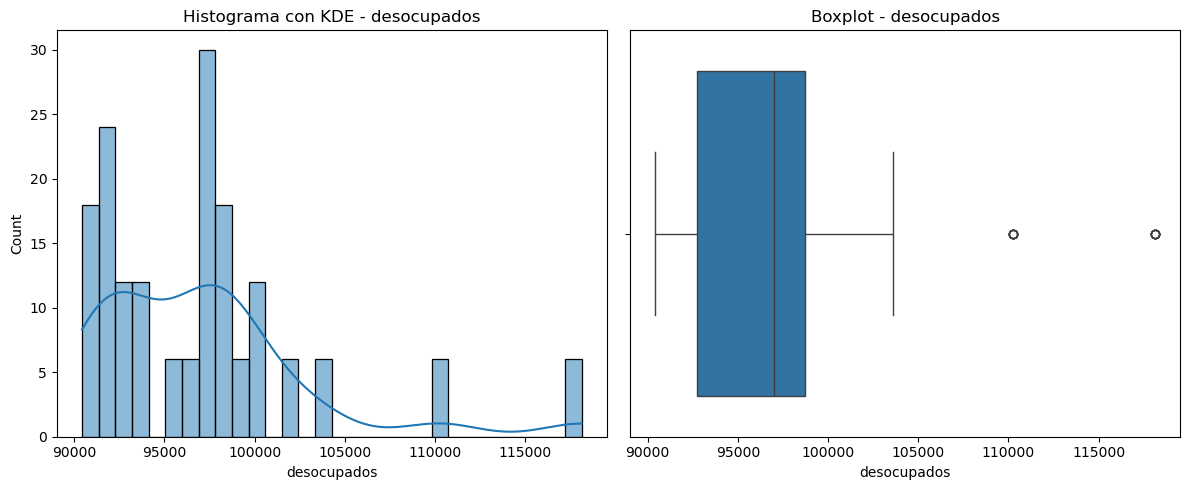

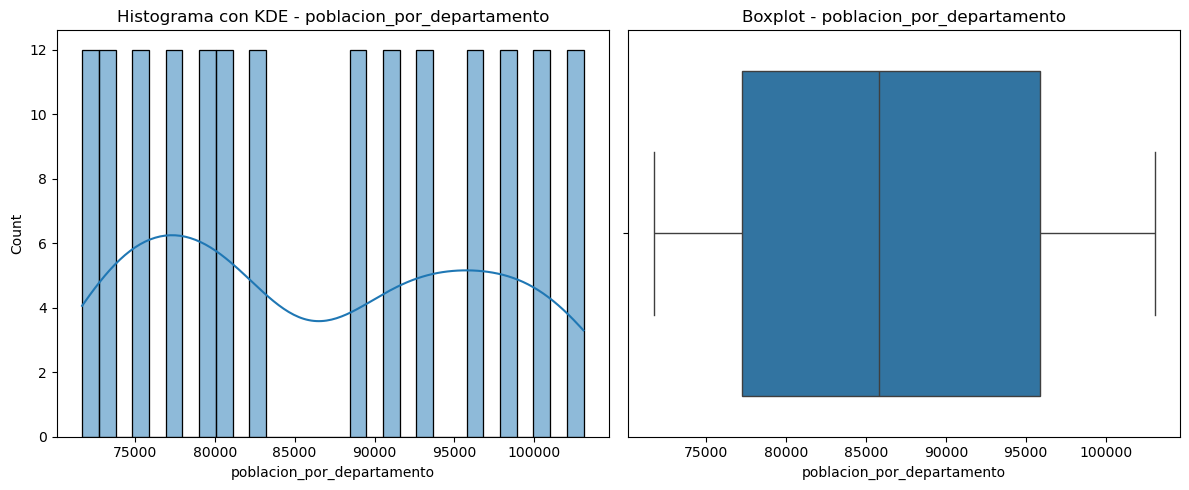

In [14]:
columnas_a_evaluar = [
    'prod_pri_exportacion_usd', 'origen_agro', 'origen_ind', 'combustible_y_energia',
       'cantidad_hechos_mes_pasado', 'tasa_delitos', 'desocupados', 'poblacion_por_departamento'
]

graficos_distribucion(df, columnas_a_evaluar)

## EDA: Interpretacion

En Tierra del Fuego, la cantidad mensual de hechos delictivos oscila entre un mínimo de 15 y un máximo de 154, con un promedio de 65 delitos por mes. La mayoría de los delitos registrados ocurrieron en domicilios particulares (116 casos), seguidos por los cometidos en establecimientos (52 casos) y en la vía pública (47 casos).

Al comparar el nivel delictivo entre los departamentos de Río Grande y Ushuaia durante el período 2017-2023, se observa que Río Grande presenta una mayor tasa de delitos y una mayor dispersión en los datos. Esto se debe a que el número de delitos alcanzó un pico significativo a principios de 2017, descendió durante el período de pandemia y volvió a incrementarse levemente en los años posteriores. En contraste, Ushuaia muestra un comportamiento más estable, con una frecuencia de delitos relativamente constante, aunque también se registra una leve disminución durante la pandemia, seguida por una recuperación hacia los niveles previos.

Por último, el análisis de la variable objetivo "nivel_criminalístico" muestra una distribución equilibrada entre clases. Cada grupo presenta un boxplot bien definido y poco superpuesto, lo que indica una buena diferenciación entre niveles. No obstante, el boxplot correspondiente al nivel alto exhibe una mayor dispersión, con un bigote superior considerablemente más extenso, lo que sugiere una mayor variabilidad en la cantidad de delitos clasificados en ese nivel.

# Preprocesamiento de datos

## Codificacion de variables categoricas
Ordinal Enconding: Se aplico este metodo para transformar la variable "nivel_criminalistico", es conveniente para árboles de decisión o random forest, ya que no influyen en la precision del modelo y no aumenta la cantidad de columnas.

In [15]:
# Definir el orden manualmente
enconder = OrdinalEncoder(categories=[['Bajo', 'Medio', 'Alto']])
df["nivel_criminalistico_cod"] = enconder.fit_transform(df[["nivel_criminalistico"]])

In [16]:
enconder = OrdinalEncoder(categories=[['no', 'balotaje', 'legislativa','presidenciales']])
df["elecciones_cod"] = enconder.fit_transform(df[["elecciones"]])

In [17]:
# Convertir variables categóricas a numéricas
le = LabelEncoder()
df["departamento_cod"] = le.fit_transform(df["departamento_nombre"])

## Normalizacion de datos

In [18]:
# Normalizar las variables numéricas
scaler = MinMaxScaler()
columnas_a_normalizar = ['cba-linea de indigencia', 'inversa del coeficiente de engel', 'cba-linea de pobreza', 'impuesto_total', 
    'total_exportacion_usd','prod_pri_exportacion_usd', 'origen_agro', 'origen_ind', 'combustible_y_energia',
    'cantidad_hechos_mes_pasado', 'poblacion_por_departamento','ocupados con ingresos','desocupados']

# Aplicar normalización solo a las columnas seleccionadas
df[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])

In [19]:
# Transforma el mes en variables cíclicas
df['mes_sin'] = np.sin(2 * np.pi * df['mes'] / 12)
df['mes_cos'] = np.cos(2 * np.pi * df['mes'] / 12)

In [20]:
df.head()

,departamento_nombre,anio,mes,cantidad_hechos,cantidad_hechos_inc_conocido,cantidad_hechos_inc_desconocido,cantidad_hechos_lugar_via_publ,cantidad_hechos_lugar_establec,cantidad_hechos_lugar_dom_part,cantidad_hechos_lugar_sd,cantidad_hechos_arma_sin_arma,cantidad_hechos_arma_sd,cantidad_hechos_origen_denuncia,cantidad_hechos_origen_intervenc,cantidad_hechos_origen_orden_jud,cantidad_hechos_origen_otro,cant_hechos_agrav_por_lesiones,cant_hechos_agrav_sin_lesiones,cantidad_inculpados,cantidad_inculpados_sexo_masc,cantidad_inculpados_sexo_fem,cantidad_inculpados_sexo_sd,cantidad_inculpados_edad_mas_18,cantidad_inculpados_edad_sd,fecha,población total,trimestre,ocupados con ingresos,poblacion_por_departamento,cba-linea de indigencia,inversa del coeficiente de engel,cba-linea de pobreza,nivel general,alimentos y bebidas no alcohólicas,bebidas alcohólicas y tabaco,prendas de vestir y calzado,"vivienda, agua, electricidad y otros combustibles",equipamiento y mantenimiento del hogar,salud,transporte,comunicación,recreación y cultura,educación,restaurantes y hoteles,bienes y servicios varios,impuesto_total,impuesto ingresos brutos,convenio multilateral,impuesto de sellos,impuesto inmobiliario,total_exportacion_usd,prod_pri_exportacion_usd,origen_agro,origen_ind,combustible_y_energia,cantidad_hechos_mes_pasado,cantidad_hechos_con_arma,inculpados_menores_edad,desocupados,elecciones,tasa_delitos,nivel_criminalistico,nivel_criminalistico_cod,elecciones_cod,departamento_cod,mes_sin,mes_cos
0,Río Grande,2017,1,121,18,103,25,11,82,3,120,0,94,27,0,0,0,0,23,19,4,0,22,0,2017-01-01,151966,1er trimestre,0.357213,0.543935,0.000000,0.714286,0.000000,102.56,100.95,101.19,100.91,110.32,101.07,104.73,102.48,101.66,100.96,106.99,102.27,102.48,0.003398,71123083.0,158601571.0,21718644.0,22115.0,0.002011,0.0,0.0,0.004634,0.0,NaN,1,1,0.040657,no,136.310382,Alto,2.0,0.0,0,0.500000,8.660254e-01
1,Río Grande,2017,2,116,20,96,15,14,84,3,116,0,87,29,0,0,0,0,21,18,3,0,18,0,2017-02-01,151966,1er trimestre,0.357213,0.543935,0.000434,0.750000,0.000717,104.28,102.25,105.36,102.38,112.02,101.28,107.01,104.41,105.74,102.53,106.69,105.67,104.28,0.000000,57416525.0,144090087.0,17667071.0,223034.0,0.000000,0.0,0.0,0.000257,0.0,0.762590,0,3,0.040657,no,130.677722,Alto,2.0,0.0,0,0.866025,5.000000e-01
2,Río Grande,2017,3,114,48,66,18,15,81,0,114,0,71,43,0,0,0,0,61,42,12,7,50,7,2017-03-01,151966,1er trimestre,0.357213,0.543935,0.001168,0.732143,0.001480,106.52,103.98,106.56,104.79,115.37,102.31,108.73,106.31,107.84,105.03,123.32,105.46,106.40,0.000981,69333643.0,145077379.0,17222376.0,149048.0,0.006841,0.0,0.0,0.015145,0.0,0.726619,0,4,0.040657,no,128.424658,Alto,2.0,0.0,0,1.000000,6.123234e-17
3,Río Grande,2017,4,154,26,128,28,32,94,0,152,0,105,49,0,0,0,0,26,19,7,0,25,0,2017-04-01,152940,2do trimestre,0.410449,0.543935,0.001627,0.785714,0.002347,108.65,105.48,109.66,105.76,119.35,103.66,110.68,107.55,115.26,108.96,123.68,107.69,108.84,0.008501,63108045.0,235841071.0,20348071.0,25087.0,0.037306,0.0,0.0,0.081443,0.0,0.712230,2,1,0.000000,no,173.485941,Alto,2.0,0.0,0,0.866025,-5.000000e-01
4,Río Grande,2017,5,117,22,95,26,5,86,0,114,0,85,32,0,0,0,0,22,18,4,0,22,0,2017-05-01,152940,2do trimestre,0.410449,0.543935,0.001874,0.785714,0.002642,110.49,107.60,111.71,106.96,123.20,105.85,112.56,108.07,115.39,112.57,123.89,108.00,109.86,0.007712,67983284.0,194554548.0,23899008.0,9975.0,0.045741,0.0,0.0,0.099800,0.0,1.000000,3,0,0.000000,no,131.804254,Alto,2.0,0.0,0,0.500000,-8.660254e-01


In [21]:
df["elecciones"].unique()

array(['no', 'legislativa', 'presidenciales', 'balotaje'], dtype=object)

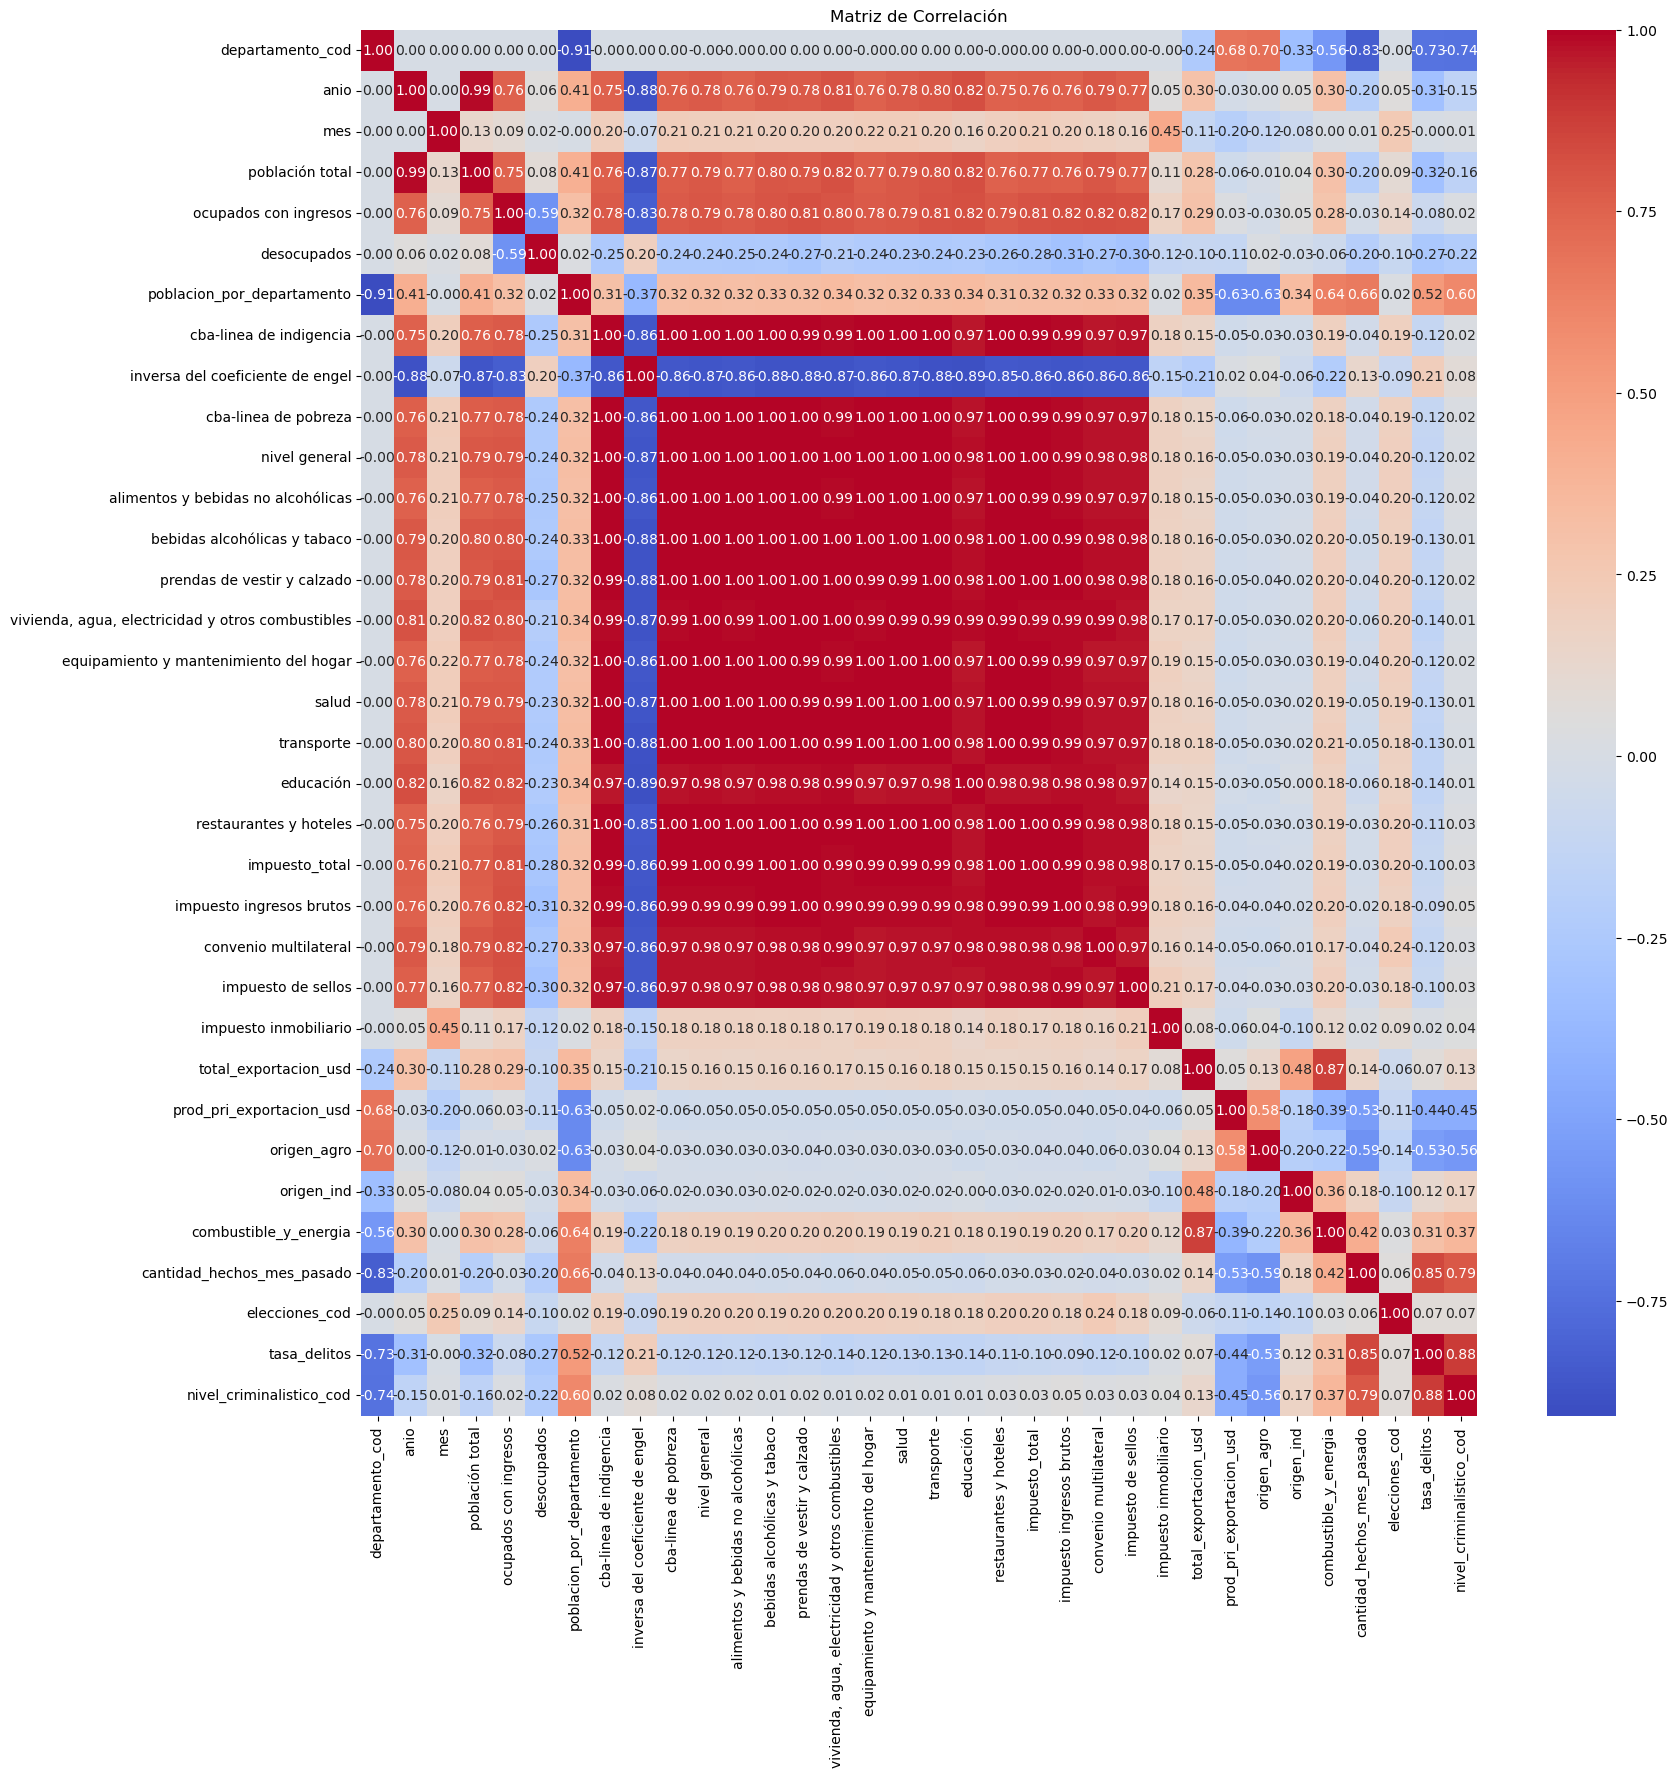

In [22]:
# Columnas numericas
columnas = ['departamento_cod','anio', 'mes','población total', 'ocupados con ingresos', 'desocupados',
       'poblacion_por_departamento', 'cba-linea de indigencia',
       'inversa del coeficiente de engel', 'cba-linea de pobreza',
       'nivel general', 'alimentos y bebidas no alcohólicas',
       'bebidas alcohólicas y tabaco', 'prendas de vestir y calzado',
       'vivienda, agua, electricidad y otros combustibles',
       'equipamiento y mantenimiento del hogar', 'salud', 'transporte',
       'educación','restaurantes y hoteles', 'impuesto_total',
       'impuesto ingresos brutos', 'convenio multilateral',
       'impuesto de sellos', 'impuesto inmobiliario', 
        'total_exportacion_usd', 'prod_pri_exportacion_usd', 'origen_agro', 'origen_ind', 'combustible_y_energia',
       'cantidad_hechos_mes_pasado','elecciones_cod', 'tasa_delitos','nivel_criminalistico_cod']

# Filtrar el dataset solo con las columnas seleccionadas
df_filtrado = df[columnas]

# Matriz de correlación
plt.figure(figsize=(18,18))
sns.heatmap(df_filtrado.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Modelos de aprendizaje supervizado

## Definicion de features y target

In [23]:
# Se seleccionaro las columnas que presentaron mayor correlacion con nivel_criminalistico_cod
columnas_seleccionadas = ['departamento_cod','mes_sin', 'mes_cos', 'anio',  'desocupados', 
    'total_exportacion_usd','prod_pri_exportacion_usd', 'origen_agro', 'origen_ind', 'combustible_y_energia',
    'cantidad_hechos_mes_pasado', 'poblacion_por_departamento']

X = df[columnas_seleccionadas]
y = df['nivel_criminalistico_cod']

## Division del conjunto

In [24]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Arbol de desicion

### Encontrando el mejor parametro

In [25]:
# Definir parámetros
param_grid_tree = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### Creacion del modelo: Tree_opt

In [26]:
# Aplicar GridSearchCV
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring="accuracy")
grid_search_tree.fit(X_train, y_train)
print("Mejores parámetros:", grid_search_tree.best_params_)
print("Mejor puntaje",grid_search_tree.best_score_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor puntaje 0.6786324786324787


In [27]:
# Crear Arbol de Decision
tree_opt = DecisionTreeClassifier(criterion='entropy', max_depth=20,min_samples_leaf=4, min_samples_split=2, random_state=42)
tree_opt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4,
                       random_state=42)

### Evaluacion del modelo

Precisión del Árbol de Decisión optimizado: 0.6176470588235294

Matriz de Confusión:
 [[ 3  6  0]
 [ 3  6  2]
 [ 0  2 12]]

Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.50      0.33      0.40         9
         1.0       0.43      0.55      0.48        11
         2.0       0.86      0.86      0.86        14

    accuracy                           0.62        34
   macro avg       0.60      0.58      0.58        34
weighted avg       0.62      0.62      0.61        34



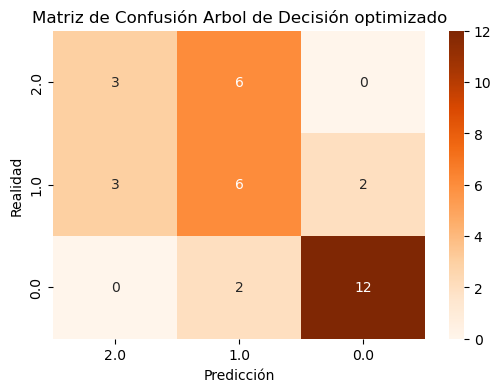

In [28]:
# Evaluación del modelo
y_pred = tree_opt.predict(X_test)

print("Precisión del Árbol de Decisión optimizado:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Oranges", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión Arbol de Decisión optimizado")
plt.show()

### Interpretacion: tree_opt

El modelo tree_opt tiene un desempeño moderado con un accuracy del 61%. Tiene una precisión media para las clases "bajo" (50%) y "medio" (43%), y un desempeño notable en la detección de la clase "alto" (86%).

A partir del recall, se observa que el modelo tiene mejor sensibilidad para la clase "alto" (86%), seguido por la clase "medio" (55%), y baja capacidad para identificar correctamente la clase "bajo" (33%).

En conclusión, el modelo muestra un rendimiento moderado, destacándose especialmente en la detección de delitos de nivel criminalístico alto, posiblemente porque esta clase presenta patrones más fácilmente identificables, incluso sin desbalance evidente en los datos.

### Creacion del modelo: tree

In [29]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Evaluacion del modelo

Precisión del Árbol de Decisión: 0.7058823529411765

Matriz de Confusión:
 [[ 6  3  0]
 [ 2  8  1]
 [ 1  3 10]]

Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         9
         1.0       0.57      0.73      0.64        11
         2.0       0.91      0.71      0.80        14

    accuracy                           0.71        34
   macro avg       0.72      0.70      0.70        34
weighted avg       0.74      0.71      0.71        34



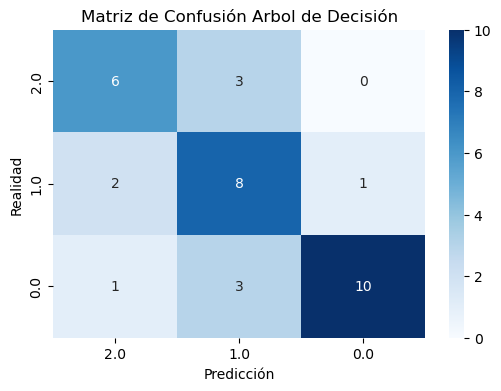

In [30]:
# Evaluación del modelo
y_pred = tree.predict(X_test)

print("Precisión del Árbol de Decisión:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión Arbol de Decisión")
plt.show()

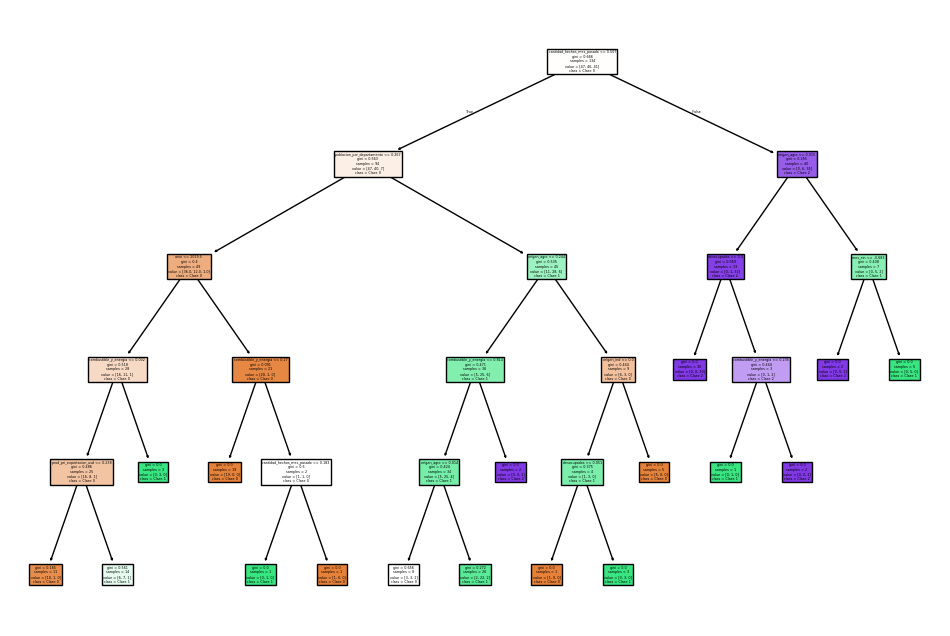

In [31]:
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X_train.columns, class_names=["Clase 0", "Clase 1","Clase 2"], filled=True)
plt.show()

### Interpretacion: tree

El modelo tree muestra un buen desempeño general, con un accuracy del 71%, siendo el segundo mejor entre los cuatro modelos evaluados. Logra una buena precisión en la clase "alto" (91%) y en la clase "bajo" (67%), mientras que la clase "medio" mantiene una precisión aceptable (57%).

El recall también es sólido: 73% para "medio", 67% para "bajo" y 71% para "alto", lo cual indica un rendimiento más equilibrado entre clases.

Ademas, observando el grafico del arbol, se puede notar que el numero de bifurcaciones esta balanceado, presenta un buen numero de cantidad de hojas, aunque presenta algunas hojas aisladas pero las justas.

En conclusión, el modelo tree ofrece un buen balance general, con capacidades consistentes para identificar las tres clases del nivel criminalístico. Además, destaca por su interpretabilidad, lo que lo convierte en una buena opción cuando se busca transparencia en la toma de decisiones.

## RandomForest

### Encontrar el mejor parametro

In [32]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [33]:
# Aplicar GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring="accuracy")
grid_search_rf.fit(X_train, y_train)
print("Mejores parámetros:", grid_search_rf.best_params_)
print("Mejor puntaje",grid_search_rf.best_score_)

Mejores parámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mejor puntaje 0.7313390313390313


C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Creacion del modelo: modelo_rf

In [34]:
modelo_rf = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=42)

### Evaluacion del modelo

Precisión del Random Forest: 0.6176470588235294

Matriz de Confusión:
 [[ 6  2  1]
 [ 5  5  1]
 [ 0  4 10]]

Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.55      0.67      0.60         9
         1.0       0.45      0.45      0.45        11
         2.0       0.83      0.71      0.77        14

    accuracy                           0.62        34
   macro avg       0.61      0.61      0.61        34
weighted avg       0.63      0.62      0.62        34



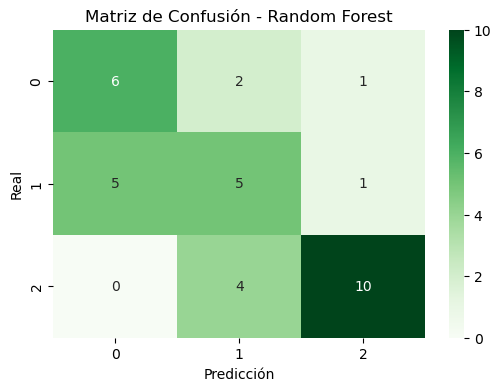

In [35]:
y_pred = modelo_rf.predict(X_test)

print("Precisión del Random Forest:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

### Interpretacion: modelo_rf

El modelo rf presenta un desempeño moderado con un accuracy del 61%, igual que tree_opt. Tiene una alta precisión en la clase "alto" (83%) y un rendimiento aceptable en "bajo" (55%), pero baja efectividad en la clase "medio" (precisión del 45%).

En cuanto al recall, se observa que detecta bien la clase "bajo" (67%), y tiene un rendimiento medio en "alto" (71%) y bajo en "medio" (45%).

En conclusion, es mejor que el modelo tree_opt ya que tiene una mejor sensibilidad para detectar las clases y mejora un poco mas en la presicion, aunque sigue estando por debajo del modelo tree. Resulta util para detectar la clase "alto" y "bajo" pero perdiendo presicion en la clase "medio".

## KNN

In [36]:
df = df.dropna(how='any')

In [37]:
columnas_seleccionadas = ['departamento_cod','mes_sin', 'mes_cos', 'anio',  'desocupados', 
    'total_exportacion_usd','prod_pri_exportacion_usd', 'origen_agro', 'origen_ind', 'combustible_y_energia',
    'cantidad_hechos_mes_pasado', 'poblacion_por_departamento']

X = df[columnas_seleccionadas]
y = df['nivel_criminalistico_cod']

In [38]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Encontrar el mejor parametro

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring="accuracy")
grid_search_knn.fit(X_train, y_train)

print("Mejores parámetros:", grid_search_knn.best_params_)
print("Mejor puntaje:", grid_search_knn.best_score_)


Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Mejor puntaje: 0.7427350427350428


### Creacion del modelo: modelo_knn

In [40]:
modelo_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='uniform')
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

### Evaluacion del modelo

Precisión del KNN: 0.7647058823529411

Matriz de Confusión:
 [[ 7  4  0]
 [ 2  5  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

         0.0       0.78      0.64      0.70        11
         1.0       0.50      0.62      0.56         8
         2.0       0.93      0.93      0.93        15

    accuracy                           0.76        34
   macro avg       0.74      0.73      0.73        34
weighted avg       0.78      0.76      0.77        34



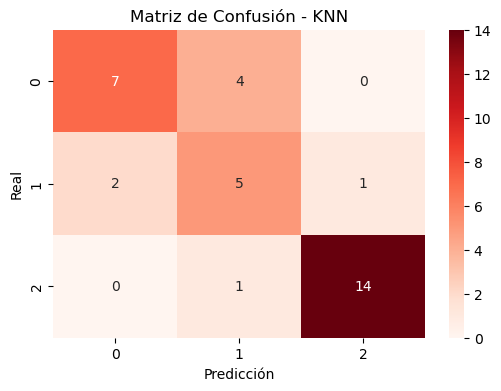

In [41]:
y_pred = modelo_knn.predict(X_test)

print("Precisión del KNN:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()

### Interpretacion: modelo_knn
El modelo knn es el que alcanza la mayor precisión global, con un accuracy del 76%. Tiene un excelente rendimiento para la clase "alto" (precisión y recall del 93%), aceptable para "bajo" (precision del 78%) y más débil en la clase "medio" (precision del 50%, recall del 62%).

En conclusión, knn es el modelo más efectivo en términos de precisión global, destacandose como el mejor para predecir la clase "alto" y "bajo". Aunque, al igual que los modelos anteriores puede no ser tan fiable para distinguir casos de nivel "medio".

# Comparacion entre modelos

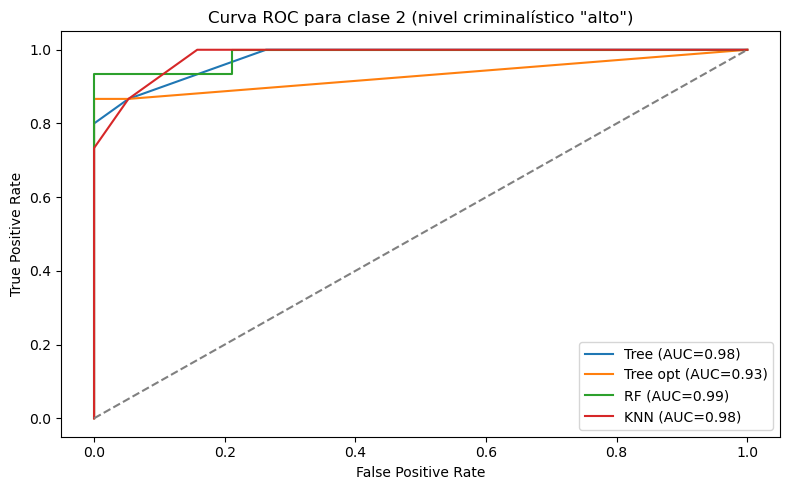

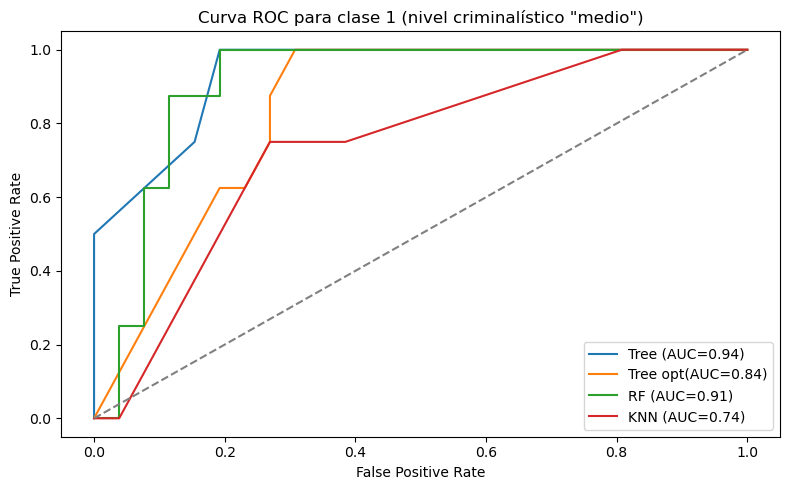

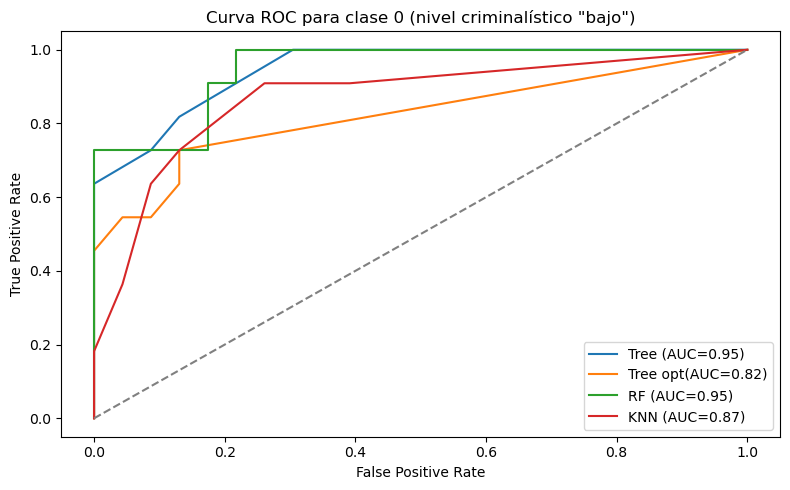

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Asegurarse de que y_test esté en formato binarizado
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # suponiendo 3 clases
n_classes = y_test_bin.shape[1]

# Binarizar predict_proba para cada modelo
y_score_tree = tree.predict_proba(X_test)
y_score_tree_opt = tree_opt.predict_proba(X_test)
y_score_rf = modelo_rf.predict_proba(X_test)
y_score_knn = modelo_knn.predict_proba(X_test)

# Función para calcular curvas fpr, tpr, y auc para cada clase
def compute_roc_auc(y_test_bin, y_score, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

fpr_tree, tpr_tree, auc_tree = compute_roc_auc(y_test_bin, y_score_tree, 'Tree')
fpr_tree_opt, tpr_tree_opt, auc_tree_opt = compute_roc_auc(y_test_bin, y_score_tree_opt, 'Tree opt')
fpr_rf, tpr_rf, auc_rf = compute_roc_auc(y_test_bin, y_score_rf, 'RF')
fpr_knn, tpr_knn, auc_knn = compute_roc_auc(y_test_bin, y_score_knn, 'KNN')

# Graficar curva ROC solo para una clase (ejemplo clase 2)
plt.figure(figsize=(8,5))
plt.plot(fpr_tree[2], tpr_tree[2], label=f'Tree (AUC={auc_tree[2]:.2f})')
plt.plot(fpr_tree_opt[2], tpr_tree_opt[2], label=f'Tree opt (AUC={auc_tree_opt[2]:.2f})')
plt.plot(fpr_rf[2], tpr_rf[2], label=f'RF (AUC={auc_rf[2]:.2f})')
plt.plot(fpr_knn[2], tpr_knn[2], label=f'KNN (AUC={auc_knn[2]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para clase 2 (nivel criminalístico "alto")')
plt.legend()
plt.tight_layout()
plt.show()

# Graficar curva ROC solo para una clase (ejemplo clase 1)
plt.figure(figsize=(8,5))
plt.plot(fpr_tree[1], tpr_tree[1], label=f'Tree (AUC={auc_tree[1]:.2f})')
plt.plot(fpr_tree_opt[1], tpr_tree_opt[1], label=f'Tree opt(AUC={auc_tree_opt[1]:.2f})')
plt.plot(fpr_rf[1], tpr_rf[1], label=f'RF (AUC={auc_rf[1]:.2f})')
plt.plot(fpr_knn[1], tpr_knn[1], label=f'KNN (AUC={auc_knn[1]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para clase 1 (nivel criminalístico "medio")')
plt.legend()
plt.tight_layout()
plt.show()

# Graficar curva ROC solo para una clase (ejemplo clase 0)
plt.figure(figsize=(8,5))
plt.plot(fpr_tree[0], tpr_tree[0], label=f'Tree (AUC={auc_tree[0]:.2f})')
plt.plot(fpr_tree_opt[0], tpr_tree_opt[0], label=f'Tree opt(AUC={auc_tree_opt[0]:.2f})')
plt.plot(fpr_rf[0], tpr_rf[0], label=f'RF (AUC={auc_rf[0]:.2f})')
plt.plot(fpr_knn[0], tpr_knn[0], label=f'KNN (AUC={auc_knn[0]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para clase 0 (nivel criminalístico "bajo")')
plt.legend()
plt.tight_layout()
plt.show()

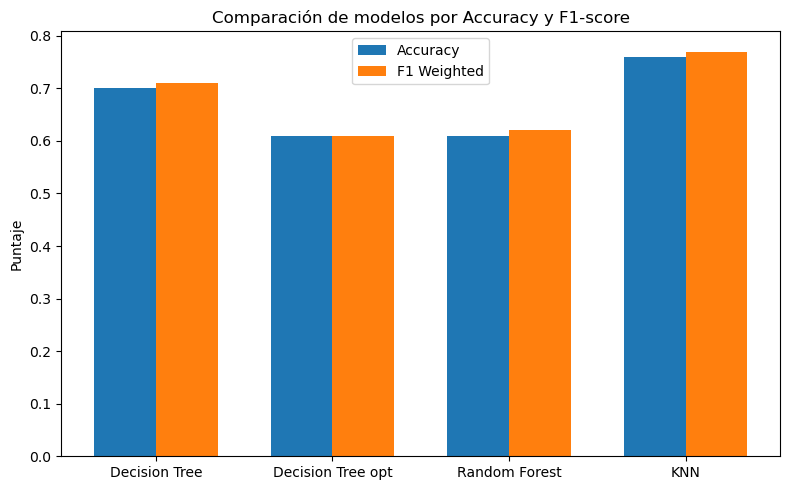

In [43]:
modelos = ['Decision Tree', 'Decision Tree opt', 'Random Forest', 'KNN']
accuracy = [0.70,  0.61, 0.61, 0.76]
f1_weighted = [0.71, 0.61, 0.62, 0.77]

x = range(len(modelos))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x, accuracy, width=width, label='Accuracy')
plt.bar([i + width for i in x], f1_weighted, width=width, label='F1 Weighted')

plt.xticks([i + width/2 for i in x], modelos)
plt.ylabel('Puntaje')
plt.title('Comparación de modelos por Accuracy y F1-score')
plt.legend()
plt.tight_layout()
plt.show()


## Curvas ROC-AUC
 A partir de las curvas ROC y los valores AUC obtenidos, se puede concluir que los cuatro modelos presentan un buen desempeño en la capacidad de discriminar entre los distintos niveles criminalisticos. Sin embargo, el modelo **Random forest optimizado** se destaca por tener los valores AUC más altos y consistentes en las tres clases: bajo (0.95), medio (0.91) y alto (0.99), lo que indica una capacidad de clasificacion superior y estable en todos los casos.
 
Aunque otros modelos como KNN y el Árbol de decision también muestran buenos resultados, el modelo Random Forest optimizado ofrece el mejor equilibrio entre sensibilidad y especificidad. Esto lo convierte en la opción más confiable cuando se busca detectar con precisión todos los niveles criminalísticos en el análisis.

# Conclusion Final

Este proyecto tuvo como objetivo desarrollar un modelo de aprendizaje automatico que sea capaz de predecir el nivel delictivo mensual de la provincia de Tierra del Fuego, siendo la variable nivel_criminalisto nivel bajo, medio o alto determinada con cuartiles.

A lo largo del proceso, se evaluaron cuatro modelos de clasificacion supervisada: Arbol de Decisión optimizado, Arbol con criterio propio, Random Forest optimizado y K-Nearest Neighbors (KNN) optimizado. Cada modelo fue analizado tanto a partir de metricas vistas en clase (precisión, recall, F1-score y accuracy), como desde su capacidad de discriminacion mediante las curvas ROC y los valores AUC.

Los resultados muestran que el modelo KNN optimizado obtuvo el mejor accuracy general (76%), mostrando una excelente capacidad para predecir correctamente los meses con nivel alto de criminalidad, aunque con menor rendimiento en los niveles medio y bajo.

Por su parte, el modelo Random Forest optimizado se destaco por ofrecer los mejores valores de AUC en las tres clases. Esto indica una alta capacidad de discriminacion, lo que lo convierte en una herramienta confiable para escenarios en los que se requiere evaluar la probabilidad de ocurrencia del delito en distintos niveles.

**En función del objetivo general del proyecto, se concluye que:**

- El modelo **_KNN optimizado_** es el más apropiado sí se busca precisión en las predicciones finales y un enfoque práctico orientado a la clasificación inmediata.

- El modelo **_Random Forest_** optimizado es el más recomendable si se prioriza una comprensión profunda del riesgo delictivo y se desea contar con un sistema más robusto frente a distintas situaciones operativas.

Este trabajo contribuye a entender cómo el uso de herramientas de aprendizaje automático puede asistir a las entidades de seguridad de Tierra del Fuego en la planificación preventiva y en la toma de decisiones estratégicas, especialmente en contextos de cambio social, migraciones estacionales o crecimiento urbano. 